## 5A Extract pattern - Standard Deviation



### <font color='Orange'> extractPatternsAllBlobs(data,nameMaterial)</font>

Función que crea el conjunto de datos y etiquetas para entrentar al modelo regresión lineal

1. Del DataFrame selecciona únicamente el Signal normalizado
2. Calcula la desviación estandard
3. Calcula el Quartil Q1 y Q3 (25% y 75%)
4. Calcula el Signal medio de todos los Signals que se encuentran entre Q1 y Q3, y pasa a ser el **Pattern** (el resto son ignorados)
5. Para cada Signal de píxel pasa a calcular la desviación estàndard Con respecto al **Pattern**
6. De la distribución calcula la gráfica de cuartiles y establece el **Threshold de la desviación estándard** repecto el  **Pattern** a **Q3+IRQ** (Q3-Q1) (en pincipio suele ser Q3+IRQ*1.5 según la gráfica de bigotes) pero se deja así para obtener datos mas acurados.

Por lo tanto el **Pattern** en realidad pasa a ser la tupla de:
* __<u>nameMaterial</u>__ --> Nombre del material del cual se ha extraido el patrón
* __<u>pattern</u>__ --> Signal Pattern
* __<u>sdPattern</u>__ --> Threshold de la desviación estándard. Para que un píxel sea reconocido, la desviación estándard de este con respecto el **Pattern** debe ser inferior a **sdPattern**

In [6]:
import pandas as pd
import numpy as np
import math

def extractPatternsAllBlobs(fileData,nameMaterial):

    data = pd.read_csv(fileData, sep='\t')
    idx0 = data.columns.get_loc('0')
    spectPixels = data.iloc[:,idx0:(idx0+224)]
    sdPixels= np.zeros(len(spectPixels))
    for n in range(len(data)):
        sdPixels[n] = np.std(spectPixels.iloc[n])

    first_quartile = np.quantile(sdPixels, 0.25)
    third_quartile = np.quantile(sdPixels, 0.75) 

    pattern = np.zeros(224)
    num=0
    for n in range(len(data)):
        desStPix = np.std(spectPixels.iloc[n])
        if(desStPix>=first_quartile and desStPix<= third_quartile):
            pattern += spectPixels.iloc[n]
            num +=1
    pattern = pattern/num 

    for n in range(len(data)):
         sdPixels[n] = math.sqrt(((spectPixels.iloc[n] - pattern)**2).sum()/224)
    first_quartile = np.quantile(sdPixels, 0.25)
    third_quartile = np.quantile(sdPixels, 0.75)
    sdPattern = third_quartile+(third_quartile-first_quartile)*1.5                            

    pattern = pd.DataFrame([[nameMaterial,pattern.to_list(),sdPattern]],columns = ['PatternName','Signal','staDevThreshold']) 

    return pattern

Lee todos los píxeles de los ***SET TRAININGs***  para genera los patrones pertinentes

<font color='Green'>(También lee el patrón directamente del fichero (en el caso que ya esté creado), evitando que sea generado de nuevo)</font>


In [10]:
import os 

sourceData = r"C:\Users\jrosell\Hyperspectral\___PFM___\01_DATASET\05_DATASET_TRAINING"
destData = r"C:\Users\jrosell\Hyperspectral\___PFM___\01_DATASET\07_DATASET__MODELS\01_Patterns_LinealRegression"

dirName = os.path.dirname(os.path.join(destData,r"PatternsSD"))
if not os.path.exists(dirName) and len(dirName)>0:
    os.makedirs(dirName)

dfPatt_HDPE = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_01a_HDPE.csv"),"HDPE")
dfPatt_HDPE.to_csv(os.path.join(destData,r"HDPE.csv"), index=False)

dfPatt_HDPE_Tricapa = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_01b_HDPE_Tricapa.csv"),"HDPE_Tricapa")
dfPatt_HDPE_Tricapa.to_csv(os.path.join(destData,r"HDPE_Tricapa.csv"), index=False)

dfPatt_PET_Monocapa = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_02a_PET_BandejaMonocapa.csv"),"PET_Monocapa")
dfPatt_PET_Monocapa.to_csv(os.path.join(destData,r"PET_Monocapa.csv"), index=False)

dfPatt_PET_Tricapa = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_02b_PET_BandejaMulticapa.csv"),"PET_Tricapa")
dfPatt_PET_Tricapa.to_csv(os.path.join(destData,r"PET_Tricapa.csv"), index=False)

dfPatt_PET_BotellaAzul = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_02c_PET_BotellaAzulado.csv"),"PET_BotellaAzulado")
dfPatt_PET_BotellaAzul.to_csv(os.path.join(destData,r"PET_BotellaAzul.csv"), index=False)

dfPatt_PET_BotellaColor = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_02d_PET_BotellaColor.csv"),"PET_BotellaColor")
dfPatt_PET_BotellaColor.to_csv(os.path.join(destData,r"PET_BotellaColor.csv"), index=False)

dfPatt_PET_BotellaLight = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_02e_PET_BotellaLight.csv"),"PET_BotellaLight")
dfPatt_PET_BotellaLight.to_csv(os.path.join(destData,r"PET_BotellaLight.csv"), index=False)

dfPatt_PP = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_03a_PP.csv"),"PP")
dfPatt_PP.to_csv(os.path.join(destData,r"PP.csv"), index=False)

dfPatt_PS = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_04a_PS.csv"),"PS")
dfPatt_PS.to_csv(os.path.join(destData,r"PS.csv"), index=False)

dfPatt_PVC = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_05a_PVC.csv"),"PVC")
dfPatt_PVC.to_csv(os.path.join(destData,r"PVC.csv"), index=False)

dfPatt_Cartoncillo = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_06a_Cartoncillo.csv"),"Cartoncillo")
dfPatt_Cartoncillo.to_csv(os.path.join(destData,r"Cartoncillo.csv"), index=False)

dfPatt_CartonColor = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_06b_CartonColor.csv"),"CartonColor")
dfPatt_CartonColor.to_csv(os.path.join(destData,r"CartonColor.csv"), index=False)

dfPatt_CartonMarron = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_06c_CartonMarron.csv"),"CartonMarron")
dfPatt_CartonMarron.to_csv(os.path.join(destData,r"CartonMarron.csv"), index=False)

dfPatt_Papel = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_06d_Papel.csv"),"Papel")
dfPatt_Papel.to_csv(os.path.join(destData,r"Papel.csv"), index=False)

dfPatt_Latas_MetalFerrico = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_07a_Latas_MetalFerrico.csv"),"Latas_MetalFerrico")
dfPatt_Latas_MetalFerrico.to_csv(os.path.join(destData,r"Latas_MetalFerrico.csv"), index=False)

dfPatt_Latas_MetalNoFerrico = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_07b_Latas_MetalNoFerrico.csv"),"Latas_MetalNoFerrico")
dfPatt_Latas_MetalNoFerrico.to_csv(os.path.join(destData,r"Latas_MetalNoFerrico.csv"), index=False)

dfPatt_Impropio_Ferrico = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_08a_Impropio_Ferrico.csv"),"Impropio_Ferrico")
dfPatt_Impropio_Ferrico.to_csv(os.path.join(destData,r"Impropio_Ferrico.csv"), index=False)

dfPatt_Impropio_NoFerrico = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_08b_Impropio_NoFerrico.csv"),"Impropio_NoFerrico")
dfPatt_Impropio_NoFerrico.to_csv(os.path.join(destData,r"Impropio_NoFerrico.csv"), index=False)

dfPatt_Impropio_Madera = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_08c_Impropio_Madera.csv"),"Impropio_Madera")
dfPatt_Impropio_Madera.to_csv(os.path.join(destData,r"Impropio_Madera.csv"), index=False)

dfPatt_Impropio_OrganicoHojas = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_08d_Impropio_OrganicoHojas.csv"),"Impropio_OrganicoHojas")
dfPatt_Impropio_OrganicoHojas.to_csv(os.path.join(destData,r"Impropio_OrganicoHojas.csv"), index=False)

dfPatt_Impropio_Textil = extractPatternsAllBlobs(os.path.join(sourceData,"blobs_004_Train_08e_Impropio_Textil.csv"),"Impropio_Textil")
dfPatt_Impropio_Textil.to_csv(os.path.join(destData,r"Impropio_Textil.csv"), index=False)



### <font color='Orange'> converter(data,nameMaterial)</font>

Función axiliat que servirá para leer el Signal al leer un fichero CSV, ya que la función de 'to_csv' de Pandas no implementa correctamente la lectura de un array, ya que lo lee como un string.


In [7]:
def converter(instr):
    return np.fromstring(instr[1:-1],sep=',')

Llamadas para leer los patrones directamente de disco (para evitar regenerarlas)

In [15]:
destData = r"C:\Users\jrosell\Hyperspectral\___PFM___\01_DATASET\07_DATASET__MODELS"

dfPatt_HDPE = pd.read_csv(os.path.join(destData,r"HDPE.csv"), converters={'Signal':converter})
dfPatt_HDPE_Tricapa = pd.read_csv(os.path.join(destData,r"HDPE_Tricapa.csv"), converters={'Signal':converter})
dfPatt_PET_Monocapa = pd.read_csv(os.path.join(destData,r"PET_Monocapa.csv"), converters={'Signal':converter})
dfPatt_PET_Tricapa = pd.read_csv(os.path.join(destData,r"PET_Tricapa.csv"), converters={'Signal':converter})
dfPatt_PET_BotellaAzul = pd.read_csv(os.path.join(destData,r"PET_BotellaAzul.csv"), converters={'Signal':converter})
dfPatt_PET_BotellaColor = pd.read_csv(os.path.join(destData,r"PET_BotellaColor.csv"), converters={'Signal':converter})
dfPatt_PET_BotellaLight = pd.read_csv(os.path.join(destData,r"PET_BotellaLight.csv"), converters={'Signal':converter})
dfPatt_PP = pd.read_csv(os.path.join(destData,r"PP.csv"), converters={'Signal':converter})
dfPatt_PS = pd.read_csv(os.path.join(destData,r"PS.csv"), converters={'Signal':converter})
dfPatt_PVC = pd.read_csv(os.path.join(destData,r"PVC.csv"), converters={'Signal':converter})
dfPatt_Cartoncillo = pd.read_csv(os.path.join(destData,r"Cartoncillo.csv"), converters={'Signal':converter})
dfPatt_CartonColor = pd.read_csv(os.path.join(destData,r"CartonColor.csv"), converters={'Signal':converter})
dfPatt_CartonMarron = pd.read_csv(os.path.join(destData,r"CartonMarron.csv"), converters={'Signal':converter})
dfPatt_Papel = pd.read_csv(os.path.join(destData,r"Papel.csv"), converters={'Signal':converter})
dfPatt_Latas_MetalFerrico = pd.read_csv(os.path.join(destData,r"Latas_MetalFerrico.csv"), converters={'Signal':converter})
dfPatt_Latas_MetalNoFerrico = pd.read_csv(os.path.join(destData,r"Latas_MetalNoFerrico.csv"), converters={'Signal':converter})
dfPatt_Impropio_Ferrico = pd.read_csv(os.path.join(destData,r"Impropio_Ferrico.csv"), converters={'Signal':converter})
dfPatt_Impropio_NoFerrico = pd.read_csv(os.path.join(destData,r"Impropio_NoFerrico.csv"), converters={'Signal':converter})
dfPatt_Impropio_Madera = pd.read_csv(os.path.join(destData,r"Impropio_Madera.csv"), converters={'Signal':converter})
dfPatt_Impropio_OrganicoHojas = pd.read_csv(os.path.join(destData,r"Impropio_OrganicoHojas.csv"), converters={'Signal':converter})
dfPatt_Impropio_Textil = pd.read_csv(os.path.join(destData,r"Impropio_Textil.csv"), converters={'Signal':converter})



Muestra la gràfica comparativa de los Signals de los distintos materiales

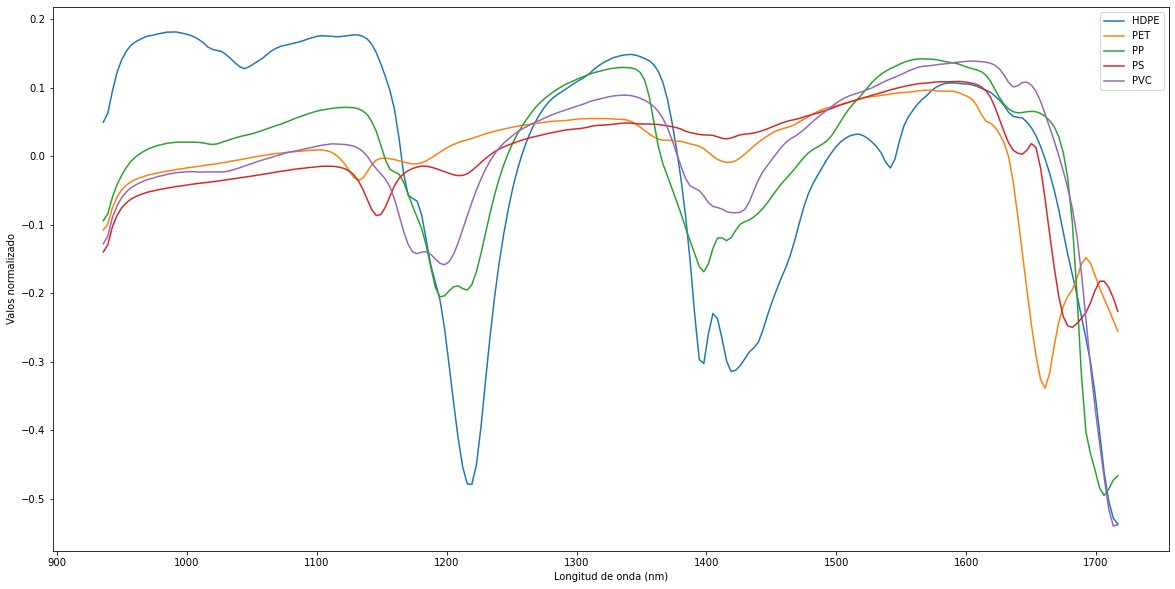

In [64]:
import matplotlib.pyplot as plt

x= np.arange(935.61, 1720.23 , (1720.23-935.61)/224).tolist()
plt.figure(figsize=(20, 10))
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Valos normalizado")
plt.plot(x,dfPatt_HDPE['Signal'][0], label="HDPE")
plt.plot(x,dfPatt_PET_BotellaColor['Signal'][0],label="PET")
plt.plot(x,dfPatt_PP['Signal'][0],label="PP")
plt.plot(x,dfPatt_PS['Signal'][0],label="PS")
plt.plot(x,dfPatt_PVC['Signal'][0],label="PVC")
#plt.plot(dfPatt_Paper['Signal'][0],label="Paper")
plt.legend(loc='best')

Una vez obtenido el **Pattern** de cada material se analiza los **SETs_TRAINING** con estos mismos patrones. De esta comparativa se muestra la matriz de confusión.

Esta comprovación nos sirve para detectar possibles outliers en el mismo **SETs_TRAINING** como detectar blobs que contienen mas de un tipo de material (por ejemplo botellas, etiquetas o tapones de distinto material) 

In [12]:
def correspondsToPattern(pixel,setPattern):
    
    sdMin = 99999
    nPatt = -1
    npPixel_norm = pixel.iloc[4:(4+224)].to_numpy()

    for idx, patt in enumerate(setPattern):    
        sdPixel = math.sqrt(((npPixel_norm - patt['Signal'][0])**2).sum()/224)   
        if sdPixel<=patt['staDevThreshold'][0]:
            if sdPixel<sdMin:
                sdMin=sdPixel
                nPatt = idx 
    return nPatt

### <font color='Orange'> analyzeSetBlobs(setBlobs, setPattern, pattDefault_Img=-1, pathDefault_Result=-1, saveImage=False,idxImage=0)</font>

* ***setBlobs***: Fichero que contiene el Dataset de TESTING a evaluar
* ***setPattern***: Lista del conjunto de patrones
* ***saveImages***: si debe crear una imagen mostrando la segmentación resultante de la clasificación
* ***pattDefault_Img***: Clase que contiente dataset, los píxeles de esta misma clase se pintarà en verde el resto en rojo
* ***pathDefault_Result***: especificación del path donde se guardan los resultados
* ***idxImage***: Índice con el que se identificarà la imagen


In [22]:
import os

def appyPatterToBlob(dfBlob, setPattern, pattDefault_Img=-1, pathDefault_Result=-1, saveImage=False,idxImage=0):

    pathImagesOut = r".\00_OUT_Standard_Deviation"
    
    if saveImage and not os.path.isdir(pathImagesOut):
        os.mkdir(pathImagesOut)
    
    img = np.zeros([96, 320 ,3]).astype(np.uint8)
    
    # Inspecciona tots els píxels i guada en un vector l'acumulat quants corresponen a cada patró
    # Sobre la imatge guarda a cada píxel el patró identificat (index patro+1, ja que el primer patró es 0) i els
    # píxels dels que no s'ha identificat cap patró si copia [255,0,0]
    buffPatt = np.zeros(len(setPattern)+1, dtype=int)
    for n in range(len(dfBlob)):
        patt = correspondsToPattern(dfBlob.iloc[n],setPattern)
        if patt>-1:            
            buffPatt[patt] += 1
        elif patt== -1:
            buffPatt[-1] += 1
                   
        if saveImage:
            if patt== -1:
                img[dfBlob.iloc[n]['y'].astype('int'),dfBlob.iloc[n]['x'].astype('int')]= [255,0,0]
            else:
                img[dfBlob.iloc[n]['y'].astype('int'),dfBlob.iloc[n]['x'].astype('int')]= [patt+1,0,0]
    result = np.where(buffPatt == np.max(buffPatt))
    
    if saveImage:
        if pattDefault_Img > -1:
            idx = np.where(np.all(img == [255,0,0], axis=-1)) 
            img[idx]= [128,128,128]
            idx = np.where(np.all(img == [pattDefault_Img+1,0,0], axis=-1)) 
            img[idx]= [0,255,0]
            for idx in range(len(setPattern)):
                idx = np.where(np.all(img == [idx+1,0,0], axis=-1)) 
                img[idx]= [0,0,255]                           
        else:
            idx = np.where(np.all(img == [255,0,0], axis=-1)) 
            img[idx]= [128,128,128]
            idx = np.where(np.all(img == [result+1,0,0], axis=-1)) 
            img[idx]= [0,255,0]
            for idx in range(len(setPattern)):
                idx = np.where(np.all(img == [idx+1,0,0], axis=-1)) 
                img[idx]= [0,0,255]  
            pass
        
        cv2.imwrite(pathImagesOut+"\\identifPatter_"+f'{idxImage:03d}'+".bmp",img)    
        
    if (pathDefault_Result==-1):
        result = np.where(buffPatt[:-1] == np.max(buffPatt[:-1]))[0][0]
    else:
        result = pathDefault_Result
        
    if np.sum(buffPatt)>0 and len(dfBlob)>0:
        percentPatt= buffPatt[result]/np.sum(buffPatt)
        percentAll= buffPatt[result]/len(dfBlob)
    else:
        percentPatt = 0.0
        percentAll = 0.0
        
    return (result,setPattern[result]['PatternName'][0],percentAll,buffPatt)

Analiza el conjunto de datasets para determinar el porcentaje de píxeles que pertenecen a cada patrón

In [41]:
from tqdm.notebook import tqdm  #mostra la barra s'estat
import os

setPatterns = [dfPatt_HDPE, dfPatt_HDPE_Tricapa, dfPatt_PET_Monocapa, dfPatt_PET_Tricapa, dfPatt_PET_BotellaAzul,
               dfPatt_PET_BotellaColor, dfPatt_PET_BotellaLight, dfPatt_PP, dfPatt_PS, dfPatt_PVC, dfPatt_Cartoncillo,
               dfPatt_CartonColor, dfPatt_CartonMarron, dfPatt_Papel, dfPatt_Latas_MetalFerrico, dfPatt_Latas_MetalNoFerrico,
               dfPatt_Impropio_Ferrico, dfPatt_Impropio_NoFerrico, dfPatt_Impropio_Madera, dfPatt_Impropio_OrganicoHojas,
               dfPatt_Impropio_Textil]

def analyzeSetBlobs(setBlobs, setPatterns):

    dataBlobs= pd.read_csv(setBlobs, sep='\t')
    idx0 = dataBlobs.columns.get_loc('0')

    groups= dataBlobs.groupby(["image","blob"]) #Imagen + blob
    keys = groups.groups.keys()

    buffSetBlobs = np.zeros(len(setPatterns), dtype=int)
    for idx, key in enumerate(tqdm(keys)): 
        dataBlob = groups.get_group(key) 
        buffPatt = np.zeros(len(setPatterns)+1, dtype=int)
        for n in range(len(dataBlob)):
            patt = correspondsToPattern(dataBlob.iloc[n],setPatterns)
            if patt>-1:            
                buffPatt[patt] += 1
        buffSetBlobs[np.where(buffPatt == np.max(buffPatt))] +=1
        
    return buffSetBlobs
        
sourceData = r"C:\Users\jrosell\Hyperspectral\___PFM___\01_DATASET\06_DATASET_TESTING"

classif_HDPE =  analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_01a_HDPE.csv"),setPatterns)
classif_HDPE_tricapa = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_01b_HDPE_Tricapa.csv"),setPatterns)
classif_PET_bandeja_monocapa = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_02a_PET_BandejaMonocapa.csv"),setPatterns)
classif_PET_bandeja_multi = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_02b_PET_BandejaMulticapa.csv"),setPatterns)
classif_PET_BA = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_02c_PET_BotellaAzulado.csv"),setPatterns)
classif_PET_BC = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_02d_PET_BotellaColor.csv"),setPatterns)
classif_PET_BL = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_02e_PET_BotellaLight.csv"),setPatterns)
classif_PP = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_03a_PP.csv"),setPatterns)
classif_PS = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_04a_PS.csv"),setPatterns)
classif_PVC = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_05a_PVC.csv"),setPatterns)
classif_Cartoncillo = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_06a_Cartoncillo.csv"),setPatterns)
classif_CartonColor = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_06b_CartonColor.csv"),setPatterns)
classif_CartonMarron = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_06c_CartonMarron.csv"),setPatterns)
classif_Paper = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_06d_Papel.csv"),setPatterns)
classif_MetalFerrico = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_07a_Latas_MetalFerrico.csv"),setPatterns)
classif_MetalNoFerrico = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_07b_Latas_MetalNoFerrico.csv"),setPatterns)
classif_Impro_Ferrico = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_08a_Impropio_Ferrico.csv"),setPatterns)
classif_Impro_NoFerrico = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_08b_Impropio_NoFerrico.csv"),setPatterns)
classif_Impro_Madera = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_08c_Impropio_Madera.csv"),setPatterns)
classif_Impro_Organico = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_08d_Impropio_OrganicoHojas.csv"),setPatterns)
classif_Impro_Textil = analyzeSetBlobs(os.path.join(sourceData,"blobs_004_Test_08e_Impropio_Textil.csv"),setPatterns)

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/1384 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/1047 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/615 [00:00<?, ?it/s]

  0%|          | 0/1041 [00:00<?, ?it/s]

  0%|          | 0/285 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/507 [00:00<?, ?it/s]

  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/796 [00:00<?, ?it/s]

  0%|          | 0/194 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Crea la **matriz de confusión** de los resultados de la evaluación de los datasets de ***TESTING***:

(Para cada dataset que porcentaje de reconocimientos pertenecientes a cada una de las clases del modelo)

<AxesSubplot:>

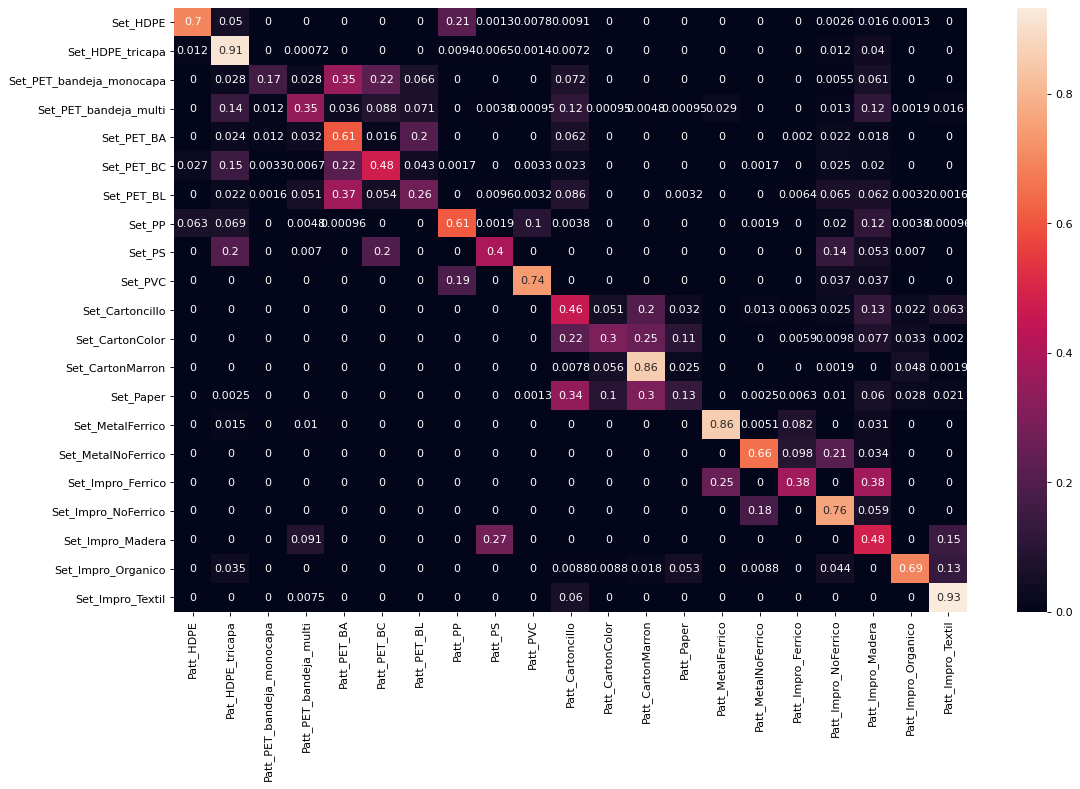

In [52]:
from matplotlib.pyplot import figure
import seaborn as sns

#CrossMatrixPer = np.array([classif_HDPE,classif_PET,classif_PP,classif_PS,classif_PVC,classif_Paper])
CrossMatrixPer = np.array([ classif_HDPE,classif_HDPE_tricapa,classif_PET_bandeja_monocapa,classif_PET_bandeja_multi,classif_PET_BA, classif_PET_BC, classif_PET_BL, classif_PP, classif_PS, 
                           classif_PVC, classif_Cartoncillo, classif_CartonColor, classif_CartonMarron, classif_Paper, 
                           classif_MetalFerrico, classif_MetalNoFerrico, classif_Impro_Ferrico, classif_Impro_NoFerrico, 
                           classif_Impro_Madera, classif_Impro_Organico, classif_Impro_Textil])

CrossMatrixPer = CrossMatrixPer.astype('float64')
CrossMatrixPer[0]=CrossMatrixPer[0]/CrossMatrixPer[0].sum().round(decimals=2)
CrossMatrixPer[1]=CrossMatrixPer[1]/CrossMatrixPer[1].sum().round(decimals=2)
CrossMatrixPer[2]=CrossMatrixPer[2]/CrossMatrixPer[2].sum().round(decimals=2)
CrossMatrixPer[3]=CrossMatrixPer[3]/CrossMatrixPer[3].sum().round(decimals=2)
CrossMatrixPer[4]=CrossMatrixPer[4]/CrossMatrixPer[4].sum().round(decimals=2)
CrossMatrixPer[5]=CrossMatrixPer[5]/CrossMatrixPer[5].sum().round(decimals=2)
CrossMatrixPer[6]=CrossMatrixPer[6]/CrossMatrixPer[6].sum().round(decimals=2)
CrossMatrixPer[7]=CrossMatrixPer[7]/CrossMatrixPer[7].sum().round(decimals=2)
CrossMatrixPer[8]=CrossMatrixPer[8]/CrossMatrixPer[8].sum().round(decimals=2)
CrossMatrixPer[9]=CrossMatrixPer[9]/CrossMatrixPer[9].sum().round(decimals=2)
CrossMatrixPer[10]=CrossMatrixPer[10]/CrossMatrixPer[10].sum().round(decimals=2)
CrossMatrixPer[11]=CrossMatrixPer[11]/CrossMatrixPer[11].sum().round(decimals=2)
CrossMatrixPer[12]=CrossMatrixPer[12]/CrossMatrixPer[12].sum().round(decimals=2)
CrossMatrixPer[13]=CrossMatrixPer[13]/CrossMatrixPer[13].sum().round(decimals=2)
CrossMatrixPer[14]=CrossMatrixPer[14]/CrossMatrixPer[14].sum().round(decimals=2)
CrossMatrixPer[15]=CrossMatrixPer[15]/CrossMatrixPer[15].sum().round(decimals=2)
CrossMatrixPer[16]=CrossMatrixPer[16]/CrossMatrixPer[16].sum().round(decimals=2)
CrossMatrixPer[17]=CrossMatrixPer[17]/CrossMatrixPer[17].sum().round(decimals=2)
CrossMatrixPer[18]=CrossMatrixPer[18]/CrossMatrixPer[18].sum().round(decimals=2)
CrossMatrixPer[19]=CrossMatrixPer[19]/CrossMatrixPer[19].sum().round(decimals=2)
CrossMatrixPer[20]=CrossMatrixPer[20]/CrossMatrixPer[20].sum().round(decimals=2)

dfCM = pd.DataFrame(CrossMatrixPer)
dfCM.index =['Set_HDPE','Set_HDPE_tricapa','Set_PET_bandeja_monocapa','Set_PET_bandeja_multi','Set_PET_BA','Set_PET_BC','Set_PET_BL','Set_PP','Set_PS','Set_PVC','Set_Cartoncillo',
             'Set_CartonColor','Set_CartonMarron','Set_Paper','Set_MetalFerrico','Set_MetalNoFerrico','Set_Impro_Ferrico',
             'Set_Impro_NoFerrico','Set_Impro_Madera','Set_Impro_Organico','Set_Impro_Textil']

dfCM.columns =['Patt_HDPE','Pat_HDPE_tricapa','Patt_PET_bandeja_monocapa','Patt_PET_bandeja_multi','Patt_PET_BA','Patt_PET_BC','Patt_PET_BL','Patt_PP','Patt_PS','Patt_PVC','Patt_Cartoncillo',
               'Patt_CartonColor','Patt_CartonMarron','Patt_Paper','Patt_MetalFerrico','Patt_MetalNoFerrico',
               'Patt_Impro_Ferrico','Patt_Impro_NoFerrico','Patt_Impro_Madera','Patt_Impro_Organico','Patt_Impro_Textil']
figure(figsize=(16, 10), dpi=80)
sns.heatmap(dfCM, annot = True)

Se agrupan los resultados por conceptos y muestra la matriz de confusión resultante:

* **HDPE** --> HDPE y HDPE_tricapa
* **PET** --> PET_bandeja_monocapa, PET_bandeja_multi, classif_PET_BA, classif_PET_BC y classif_PET_BL
* **PP** --> PP
* **PS** --> PS
* **PVC** --> PVC
* **Carton** --> Cartoncillo, CartonColor, CartonMarron, Paper
* **MetalFerrico** --> Latas_MetalFerrico y Impro_Ferrico
* **MetalNoFerrico** --> Latas_MetalNoFerrico y Impro_NoFerrico
* **Impro_Madera** --> Impro_Madera
* **Impro_Organico** --> Impro_Organico
* **Impro_Textil** --> Impro_Textil

<AxesSubplot:>

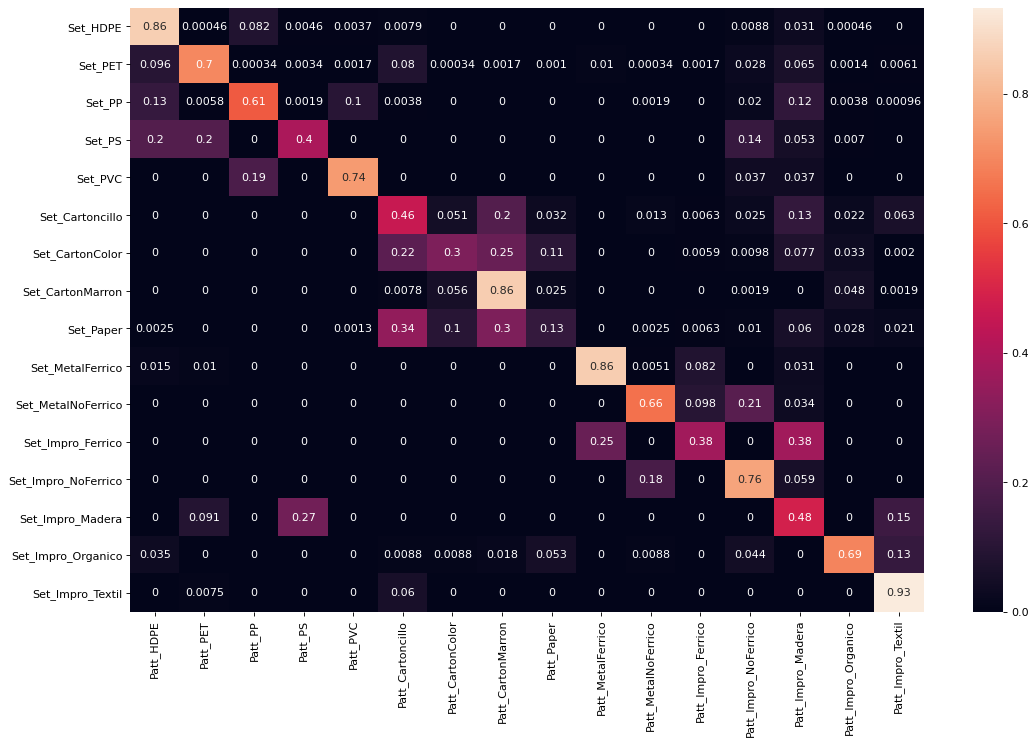

In [73]:
from matplotlib.pyplot import figure

#CrossMatrixPer = np.array([classif_HDPE,classif_PET,classif_PP,classif_PS,classif_PVC,classif_Paper])

CrossMatrixPer = np.array([ classif_HDPE, classif_HDPE_tricapa, classif_PET_bandeja_monocapa, classif_PET_bandeja_multi,
                           classif_PET_BA, classif_PET_BC, classif_PET_BL, classif_PP, classif_PS, classif_PVC, classif_Cartoncillo,
                           classif_CartonColor, classif_CartonMarron, classif_Paper, classif_MetalFerrico, classif_MetalNoFerrico,
                           classif_Impro_Ferrico, classif_Impro_NoFerrico, classif_Impro_Madera, classif_Impro_Organico,classif_Impro_Textil])

CrossMatrixPer = CrossMatrixPer.astype('float64')

# Unifica HDPE y HDPE_tricapa en una sola clase HDPE
CrossMatrixPer[:,0] = CrossMatrixPer[:,0] +CrossMatrixPer[:,1]
CrossMatrixPer = np.delete(CrossMatrixPer,1,1)
CrossMatrixPer[0,:] = CrossMatrixPer[0,:] +CrossMatrixPer[1,:]
CrossMatrixPer = np.delete(CrossMatrixPer,1,0)

# Unifica classif_PET_bandeja_monocapa, classif_PET_bandeja_multi,classif_PET_BA, classif_PET_BC y classif_PET_BL en una sola clase PET
CrossMatrixPer[:,1] = CrossMatrixPer[:,1]+CrossMatrixPer[:,2]+CrossMatrixPer[:,3]+CrossMatrixPer[:,4]+CrossMatrixPer[:,5]
CrossMatrixPer = np.delete(CrossMatrixPer,[2,3,4,5],1)
CrossMatrixPer[1,:] = CrossMatrixPer[1,:]+CrossMatrixPer[2,:]+CrossMatrixPer[3,:]+CrossMatrixPer[4,:]+CrossMatrixPer[5,:]
CrossMatrixPer = np.delete(CrossMatrixPer,[2,3,4,5],0)

# Unifica Cartoncillo, CartonColor, CartonMarron y Paper en una sola clase "Carton"
CrossMatrixPer[:,5] = CrossMatrixPer[:,5]+CrossMatrixPer[:,6]+CrossMatrixPer[:,7]+CrossMatrixPer[:,8]
CrossMatrixPer = np.delete(CrossMatrixPer,[6,7,8],1)
CrossMatrixPer[5,:] = CrossMatrixPer[5,:]+CrossMatrixPer[6,:]+CrossMatrixPer[7,:]+CrossMatrixPer[8,:]
CrossMatrixPer = np.delete(CrossMatrixPer,[6,7,8],0)

# Unifica classif_MetalFerrico y classif_Impro_Ferrico en una sola clase "Ferrico"
CrossMatrixPer[:,6] = CrossMatrixPer[:,6]+CrossMatrixPer[:,8]
CrossMatrixPer = np.delete(CrossMatrixPer,[8],1)
CrossMatrixPer[6,:] = CrossMatrixPer[6,:]+CrossMatrixPer[8,:]
CrossMatrixPer = np.delete(CrossMatrixPer,[8],0)

# Unifica classif_MetalNoFerrico y classif_Impro_NoFerrico en una sola clase "NoFerrico"
CrossMatrixPer[:,7] = CrossMatrixPer[:,7]+CrossMatrixPer[:,8]
CrossMatrixPer = np.delete(CrossMatrixPer,[8],1)
CrossMatrixPer[7,:] = CrossMatrixPer[7,:]+CrossMatrixPer[8,:]
CrossMatrixPer = np.delete(CrossMatrixPer,[8],0)

CrossMatrixPer[0]=CrossMatrixPer[0]/CrossMatrixPer[0].sum().round(decimals=2)
CrossMatrixPer[1]=CrossMatrixPer[1]/CrossMatrixPer[1].sum().round(decimals=2)
CrossMatrixPer[2]=CrossMatrixPer[2]/CrossMatrixPer[2].sum().round(decimals=2)
CrossMatrixPer[3]=CrossMatrixPer[3]/CrossMatrixPer[3].sum().round(decimals=2)
CrossMatrixPer[4]=CrossMatrixPer[4]/CrossMatrixPer[4].sum().round(decimals=2)
CrossMatrixPer[5]=CrossMatrixPer[5]/CrossMatrixPer[5].sum().round(decimals=2)
CrossMatrixPer[6]=CrossMatrixPer[6]/CrossMatrixPer[6].sum().round(decimals=2)
CrossMatrixPer[7]=CrossMatrixPer[7]/CrossMatrixPer[7].sum().round(decimals=2)
CrossMatrixPer[8]=CrossMatrixPer[8]/CrossMatrixPer[8].sum().round(decimals=2)
CrossMatrixPer[9]=CrossMatrixPer[9]/CrossMatrixPer[9].sum().round(decimals=2)
CrossMatrixPer[10]=CrossMatrixPer[10]/CrossMatrixPer[10].sum().round(decimals=2)
dfCM = pd.DataFrame(CrossMatrixPer)

dfCM.index = ['Set_HDPE', 'Set_PET', 'Set_PP', 'Set_PS', 'Set_PVC', 'Set_Carton', 'Set_MetalFerrico', 'Set_MetalNoFerrico',
              'Set_Impro_Madera', 'Set_Impro_Organico','Set_Impro_Textil']
dfCM.columns=['Patt_HDPE', 'Patt_PET', 'Patt_PP', 'Patt_PS', 'Patt_PVC', 'Patt_Carton', 'Patt_MetalFerrico', 'Patt_MetalNoFerrico',
              'Patt_Impro_Madera', 'Patt_Impro_Organico','Patt_Impro_Textil']

figure(figsize=(16, 10), dpi=80)
sns.heatmap(dfCM, annot = True,fmt='.3f')